<a href="https://colab.research.google.com/github/wel51x/DS-Unit-4-Sprint-3-Neural-Networks/blob/master/My_DS_Unit_4_Sprint_3_Neural_Nets_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks Sprint Challenge

## 1) Define the following terms:

- Neuron
- Input Layer
- Hidden Layer
- Output Layer
- Activation
- Backpropagation

### Neuron:
![Wikipedia Neuron Diagram](https://cdn4.explainthatstuff.com/neuron-labeled-diagram.png)

In biology, a neuron is a basic building block of the brain, a cell that receives signals at the dendrite of the cell and sends them to the cell body. If the received signals surpass a certain threshold with a given timing then the neuron fires, sending a large spike of energy down the axon and through the axon terminals to other neurons down the line (reference above diagram). In AI a 'neuron' is one node in a neural network. It receives information from previous nodes in a network, computes an output based on weights given to those pieces of information, and passes on a output to other nodes via an activation 
### Input Layer:
The Input Layer is what receives input from the features in a dataset.
### Hidden Layer:
Layers after the input layer are called Hidden Layers. This is because they cannot be accessed except through the input layer. They're composed of a user-specified number of neurons, and allow neural networks to fit non-linear patterns in data.
### Output Layer:
The final layer is called the Output Layer. The purpose of the output layer is to output values that are in a format suitable for interpretation in light of the type of problem that we're trying to address. 
function.
### Activation:
The activation function decides whether a cell "fires" or not. Sometimes it is said that the cell is "activated" or not.
### Backpropagation:
In backpropagation the error (the "cost" that computed by comparing the calculated output and the known correct target output) is used to update the model parameters. The total error at the output nodes is calculated and propagated back through the network in each layer.


In [0]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import SGD, Adam, Nadam, RMSprop
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.width', 1000)

## 2) Create a perceptron class that can model the behavior of an AND gate. You can use the following table as your training data:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 1  | 1  | 1  | 1 |
| 1  | 0  | 1  | 0 |
| 0  | 1  | 1  | 0 |
| 0  | 0  | 1  | 0 |

In [0]:
np.random.seed(1)

inputs = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]    
])

correct_outputs = [[0], [0], [0], [1]]

In [48]:
weights = 2 * np.random.random((3, 1)) - 1
weights

array([[-0.39533485],
       [-0.70648822],
       [-0.81532281]])

In [0]:
def perceptrn(inputs, weights, iter):
  def sigmoid(x):
    return 1 / (1 + np.exp(-x))

  def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))
  
  for iteration in range(iter):
    weighted_sum = np.dot(inputs, weights)
    activated_output = sigmoid(weighted_sum)
    error = correct_outputs - activated_output
    sd = sigmoid_derivative(activated_output)
    adjustments = error * sd
    weights += np.dot(inputs.T, adjustments)

  return (weights, activated_output)

In [49]:
w, ao = perceptrn(inputs, weights, 1000)

print("Input:")
print(inputs[:,:2])

print("\nWeights after training:")
print(w)

print("\nOutput after training:")
print(ao)
print("\nOutput after training rounded as int:")
for i in ao:
  print(int(i+.5))

Input:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]

Weights after training:
[[  7.20591048]
 [  7.20591023]
 [-11.09703577]]

Output after training:
[[1.52026008e-05]
 [2.00332884e-02]
 [2.00332934e-02]
 [9.64898617e-01]]

Output after training rounded as int:
0
0
0
1


## 3) Implement a Neural Network Multilayer Perceptron class that uses backpropagation to update the network's weights. 
- Your network must have one hidden layer. 
- You do not have to update weights via gradient descent. You can use something like the derivative of the sigmoid function to update weights.
- Train your model on the Heart Disease dataset from UCI:

[Github Dataset](https://github.com/ryanleeallred/datasets/blob/master/heart.csv)

[Raw File on Github](https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv)


In [103]:
url = "https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv"

df = pd.read_csv(url, header=0)
print("df.shape=", df.shape)
print("\n", df.head(5))
print("\nTarget Value Counts")
print(df.target.value_counts())

y = df.target
X = df.drop(columns=["target"],axis=1)

X = MinMaxScaler().fit_transform(X)
print("X.shape=", X.shape)
print("y.shape=", y.shape)

df.shape= (303, 14)

    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1        0      150      0      2.3      0   0     1       1
1   37    1   2       130   250    0        1      187      0      3.5      0   0     2       1
2   41    0   1       130   204    0        0      172      0      1.4      2   0     2       1
3   56    1   1       120   236    0        1      178      0      0.8      2   0     2       1
4   57    0   0       120   354    0        1      163      1      0.6      2   0     2       1

Target Value Counts
1    165
0    138
Name: target, dtype: int64
X.shape= (303, 13)
y.shape= (303,)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [0]:
class NeuralNet(object):
       
    def __init__(self, n_hidden=30, l2=0.01, epochs=100, eta=0.001,
                shuffle=True, minibatch_size=1, seed=None):
      self.random = np.random.RandomState(seed)
      self.n_hidden = n_hidden
      self.l2 = l2
      self.epochs = epochs
      self.eta = eta
      self.shuffle = shuffle
      self.minibatch_size = minibatch_size
        
    def onehot(self, y, n_classes):        
      onehot = np.zeros((n_classes, y.shape[0]))
      for idx, val in enumerate(y.astype(int)):
        onehot[val, idx] = 1.
      return onehot.T
    
    def sigmoid(self, z):
      return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def forward(self, X):
      # step 1: net input of hidden layer
      z_h = np.dot(X, self.w_h) + self.b_h
        
      # step 2: activation of hidden layer
      a_h = self.sigmoid(z_h)
        
      # step 3: net input of output layer
      z_out = np.dot(a_h, self.w_out) + self.b_out
        
      # step 4: activation layer output
      a_out = self.sigmoid(z_out)
        
      return z_h, a_h, z_out, a_out
    
    def compute_cost(self, y_enc, output):
      e = 0.000000001
      L2_term = (self.l2 * (np.sum(self.w_h ** 2.) + np.sum(self.w_out ** 2.)))
      t1 = -y_enc * (np.log(output + e))
      t2 = (1. - y_enc) * np.log(1. - output + e)
      cost = np.sum(t1 - t2) + L2_term
      return cost
    
    def predict(self, X):
      z_h, a_h, z_out, a_out = self.forward(X)
      y_pred = np.argmax(z_out, axis=1)
      return y_pred
    
    def fit(self, X_train, y_train, X_val, y_val):
      n_output = np.unique(y_train).shape[0]
      n_features = X_train.shape[1]
      
      # weights for input -> hidden
      self.b_h = np.zeros(self.n_hidden)
      self.w_h = self.random.normal(loc=0.0, scale=0.1,
                                    size=(n_features,
                                          self.n_hidden))
        
      # weights for hidden -> output
      self.b_out = np.zeros(n_output)
      self.w_out = self.random.normal(loc=0.0, scale=0.1,
                                       size=(self.n_hidden,
                                       n_output))
        
      epoch_strlen = len(str(self.epochs)) # for progr. format
      self.eval_ = {'cost' : [], 'train_acc' : [], 'val_acc' : []}
        
      y_train_enc = self.onehot(y_train, n_output)
        
      # iterate over training epochs
      for i in range(self.epochs):
            
          # iterate over mini batches
          indices = np.arange(X_train.shape[0])
          
          if self.shuffle:
            self.random.shuffle(indices)
          
          for start_idx in range(0, indices.shape[0] - self.minibatch_size + 1, self.minibatch_size):
            batch_idx = indices[start_idx:start_idx + self.minibatch_size]
            
            # Fwd propagation
            z_h, a_h, z_out, a_out = self.forward(X_train[batch_idx])
            
            # Back propagation
            
            # [n_samples n_classlabels]
            sigma_out = a_out - y_train_enc[batch_idx]
            
            # [n_samples n_hidden]
            sigmoid_derivative_h = a_h * (1. - a_h)
            
            # [n_samples, n_classlabels] dot [n_classlabels, n_hidden]
            # -> [n_samples, n_hidden]
            sigma_h = (np.dot(sigma_out, self.w_out.T) * sigmoid_derivative_h)
            
            # [n_features, n_samples] dot [n_samples, n_hidden]
            # -> [n_features, n_hidden]
            grad_w_h = np.dot(X_train[batch_idx].T, sigma_h)
            grad_b_h = np.sum(sigma_h, axis=0)
            
            # [n_hidden, n_samples] dot [n_samples, n_classlabels]
            # -> [n_hidden, n_classlabels]
            grad_w_out = np.dot(a_h.T, sigma_out)
            grad_b_out = np.sum(sigma_out, axis=0)
            
            # Regularization and weight updates
            delta_w_h = (grad_w_h + self.l2 * self.w_h)
            delta_b_h = grad_b_h # bias not regularized
            self.w_h -= self.eta * delta_w_h
            self.b_h -= self.eta * delta_b_h
            
            delta_w_out = grad_w_out + self.l2 * self.w_out
            delta_b_out = grad_b_out # bias not regularized
            self.w_out -= self.eta * delta_w_out
            self.b_out -= self.eta * delta_b_out

          # evaluation after each epoch during training
          z_h, a_h, z_out, a_out = self.forward(X_train)
          
          cost = self.compute_cost(y_enc=y_train_enc, output=a_out)
          
          y_train_pred = self.predict(X_train)
          y_val_pred = self.predict(X_val)
          
          temp = (np.sum(y_train == y_train_pred)).astype(np.float)
          train_acc = temp / X_train.shape[0]
          temp = (np.sum(y_val == y_val_pred)).astype(np.float)
          val_acc = temp / X_val.shape[0]
          
          self.eval_['cost'].append(cost)
          self.eval_['train_acc'].append(train_acc)
          self.eval_['val_acc'].append(val_acc)
          
          if self.epochs > 100 and i % 20 != 0:
            continue
          else:
            print('Iteration: %0*d/%d; Cost: %.2f; Train/Test Accuracy: %.2f%%/%.2f%%'
                        % (epoch_strlen, i+1, self.epochs, cost,
                           train_acc*100, val_acc*100))
            
      print('Iteration: %0*d/%d; Cost: %.2f; Train/Test Accuracy: %.2f%%/%.2f%%'
                      % (epoch_strlen, i+1, self.epochs, cost,
                         train_acc*100, val_acc*100))

      return self

In [135]:
# Test Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

print ("X_train, y_test shapes=", y_train.shape, y_train.shape)
print ("X_test, y_test shapes=", X_test.shape, y_test.shape)

X_train, y_test shapes= (257,) (257,)
X_test, y_test shapes= (46, 13) (46,)


In [136]:
# Initialize a new NN
nn = NeuralNet(epochs= 500, minibatch_size= 25, seed = 69)

# Run the NN
nn.fit(X_train, y_train, X_test, y_test)

Iteration: 001/500; Cost: 358.34; Train/Test Accuracy: 53.31%/60.87%
Iteration: 021/500; Cost: 352.35; Train/Test Accuracy: 53.31%/60.87%
Iteration: 041/500; Cost: 348.48; Train/Test Accuracy: 53.31%/60.87%
Iteration: 061/500; Cost: 342.49; Train/Test Accuracy: 63.81%/71.74%
Iteration: 081/500; Cost: 332.98; Train/Test Accuracy: 72.37%/76.09%
Iteration: 101/500; Cost: 319.03; Train/Test Accuracy: 77.04%/76.09%
Iteration: 121/500; Cost: 300.70; Train/Test Accuracy: 78.60%/78.26%
Iteration: 141/500; Cost: 280.42; Train/Test Accuracy: 79.77%/78.26%
Iteration: 161/500; Cost: 260.99; Train/Test Accuracy: 80.54%/78.26%
Iteration: 181/500; Cost: 244.85; Train/Test Accuracy: 80.54%/80.43%
Iteration: 201/500; Cost: 232.31; Train/Test Accuracy: 80.54%/78.26%
Iteration: 221/500; Cost: 222.93; Train/Test Accuracy: 80.54%/78.26%
Iteration: 241/500; Cost: 215.81; Train/Test Accuracy: 80.93%/78.26%
Iteration: 261/500; Cost: 210.24; Train/Test Accuracy: 80.93%/78.26%
Iteration: 281/500; Cost: 205.85; 

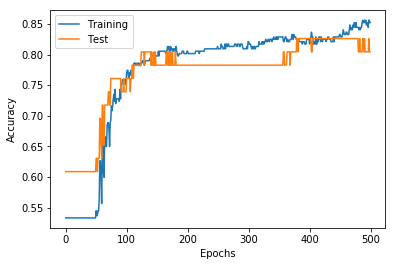

In [137]:
# Graph results
plt.plot(range(nn.epochs), nn.eval_['train_acc'], label = "Training")
plt.plot(range(nn.epochs), nn.eval_['val_acc'], label = "Test")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

## 4) Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy. 

- Use the Heart Disease Dataset (binary classification)
- Use an appropriate loss function for a binary classification task
- Use an appropriate activation function on the final layer of your network. 
- Train your model using verbose output for ease of grading.
- Use GridSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
- When hyperparameter tuning, show you work by adding code cells for each new experiment. 
- Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
- You must hyperparameter tune at least 5 parameters in order to get a 3 on this section.

#### Tune Batch and Epoch Hyperparameters



In [141]:
# Function to create model, required for KerasClassifier
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=13, activation='relu'))
	model.add(Dense(16, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy',
                optimizer='adam', metrics=['accuracy'])
	return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=1)

# define the grid search parameters
# batch_size = [10, 20, 40, 60, 80, 100]
# param_grid = dict(batch_size=batch_size, epochs=epochs)

# define the grid search parameters
param_grid = {'batch_size': [10, 20, 50, 80, 100],
              'epochs': [20, 40, 60, 80, 100]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, y, verbose=0)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: 0.6930693061438331 using {'batch_size': 10, 'epochs': 60}
Means: 0.5016501660000766, Stdev: 0.23904051073659488 with: {'batch_size': 10, 'epochs': 20}
Means: 0.6600660082727375, Stdev: 0.09334743118104609 with: {'batch_size': 10, 'epochs': 40}
Means: 0.6930693061438331, Stdev: 0.09933937796101726 with: {'batch_size': 10, 'epochs': 60}
Means: 0.6666666691256041, Stdev: 0.07851733860078751 with: {'batch_size': 10, 'epochs': 80}
Means: 0.6600660050761188, Stdev: 0.104261178156353 with: {'batch_size': 10, 'epochs': 100}
Means: 0.4851485215397951, Stdev: 0.19113442245680692 with: {'batch_size': 20, 'epochs': 20}
Means: 0.66006601092839, Stdev: 0.10673902414339122 with: {'batch_size': 20, 'epochs': 40}
Means: 0.66996699945368, Stdev: 0.09779228528919548 with: {'batch_size': 20, 'epochs': 60}
Means: 0.6897689765042597, Stdev: 0.1042611942388907 with: {'batch_size': 20, 'epochs': 80}
Means: 0.6402640267960703, Stdev: 0.11005499554696682 with: {'batch_size': 20, 'epochs': 100}
Means: 0.23

#### Tune Optimizer and Learning Rate Hyperparameters

In [0]:
# Function to create model, add optimizer, learning rate params
def create_opt_model(optimizer=SGD,
                     lr=0.0001):
	# create model
	model = Sequential()
	model.add(Dense(12, input_dim=13, activation='relu'))
	model.add(Dense(16, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	optimizer=optimizer(lr=lr)
  # Compile model
	model.compile(loss='binary_crossentropy',
                optimizer='adam', metrics=['accuracy'])
	return model

In [143]:
# use 'batch_size': 10, 'epochs': 60 - gave best results in previous step
model = KerasClassifier(build_fn=create_opt_model, batch_size=10,
                        epochs=60, verbose=0)

# define the grid search parameters
param_grid = {'optimizer': [SGD, Adam, RMSprop, Nadam],
              'lr': [.01, .001, .0001, .00001]} # learning rate

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: 0.6897689774878347 using {'lr': 0.001, 'optimizer': <class 'keras.optimizers.RMSprop'>}
Means: 0.66006600896124, Stdev: 0.10172299415884367 with: {'lr': 0.01, 'optimizer': <class 'keras.optimizers.SGD'>}
Means: 0.6468646871571494, Stdev: 0.11327393722677023 with: {'lr': 0.01, 'optimizer': <class 'keras.optimizers.Adam'>}
Means: 0.66996699551938, Stdev: 0.10550736791334848 with: {'lr': 0.01, 'optimizer': <class 'keras.optimizers.RMSprop'>}
Means: 0.6798679899461199, Stdev: 0.09299671409861901 with: {'lr': 0.01, 'optimizer': <class 'keras.optimizers.Nadam'>}
Means: 0.6897689755206847, Stdev: 0.11356204915824429 with: {'lr': 0.001, 'optimizer': <class 'keras.optimizers.SGD'>}
Means: 0.6699670017159024, Stdev: 0.12790641637584946 with: {'lr': 0.001, 'optimizer': <class 'keras.optimizers.Adam'>}
Means: 0.6897689774878347, Stdev: 0.1132739373585937 with: {'lr': 0.001, 'optimizer': <class 'keras.optimizers.RMSprop'>}
Means: 0.66006601289554, Stdev: 0.09644646488950359 with: {'lr': 0.001